In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv('NY-House-Dataset.csv')
data.head()





,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [12]:
print(data.dtypes)

BROKERTITLE                     object
TYPE                            object
PRICE                            int64
BEDS                             int64
BATH                           float64
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object


In [11]:
data.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [15]:
df = data[['PRICE','BEDS','BATH','PROPERTYSQFT']]
print(df)
df.head()

          PRICE  BEDS       BATH  PROPERTYSQFT
0        315000     2   2.000000   1400.000000
1     195000000     7  10.000000  17545.000000
2        260000     4   2.000000   2015.000000
3         69000     3   1.000000    445.000000
4      55000000     7   2.373861  14175.000000
...         ...   ...        ...           ...
4796     599000     1   1.000000   2184.207862
4797     245000     1   1.000000   2184.207862
4798    1275000     1   1.000000   2184.207862
4799     598125     2   1.000000    655.000000
4800     349000     1   1.000000    750.000000

[4801 rows x 4 columns]


,PRICE,BEDS,BATH,PROPERTYSQFT
0,315000,2,2.000000,1400.0
1,195000000,7,10.000000,17545.0
2,260000,4,2.000000,2015.0
3,69000,3,1.000000,445.0
4,55000000,7,2.373861,14175.0


In [53]:
X_data = np.array(df[['BEDS','BATH','PROPERTYSQFT']])
y_data = np.array(df[['PRICE']])
print(f"X_data.shape: {X_data.shape}")
max_index = np.argmax(y_data)

print(f"max_index: {max_index}")
print(f"Valor maximo y = {y_data[max_index]}")

X_data = np.delete(X_data, max_index, axis=0)
y_data = np.delete(y_data, max_index)


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

print(f"X_data.shape: {X_data.shape}")
print(f"y_data.shape: {y_data.shape}")

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


X_data.shape: (4801, 3)
max_index: 304
Valor maximo y = [2147483647]
X_data.shape: (4800, 3)
y_data.shape: (4800,)
(3840, 3)
(3840,)
(960, 3)
(960,)


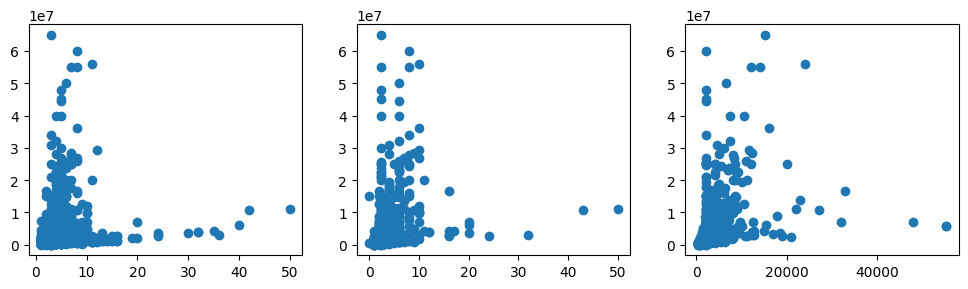

In [62]:
fig, ax = plt.subplots(1,3, figsize = (12,3))


for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)

plt.show()

In [66]:
def compute_cost(X, y, w, b):
    
    m = X.shape[0]
    for i in range(m):
        f_wb = np.dot(w, X[i,:]) + b
        cost = cost + (f_wb - y[i])**2
        cost = (1/(2*m))*cost

    return (1/(2*m))*cost

In [ ]:
def compute_gradient(X, y, w, b):
    